# Example 2

Creating geometry from B-Splines and circle arcs. Also shows how to set ID numbers for geometry entities and how to specify element density. 

In [1]:
import numpy as np

import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis_mpl as cfv

## Define geometry

All mesh generation starts by creating a Geometry object.

In [2]:
g = cfg.Geometry()

## Add points

In this example we set the IDs manually.

In [3]:
g.point([-2,  0], ID=0)

elSize determines the size of the elements near this point.

In [4]:
g.point([0,  1], ID=1, el_size=5)

elSize is 1 by default. Larger number means less dense mesh. 
Size means the length of the sides of the elements.

In [5]:
g.point([1,  0], 2, el_size=5)
g.point([0, -2], 3)  
g.point([0,  0], 4, el_size=5)
g.point([.5, .2], 5)
g.point([-.5, .5], 6)
g.point([-.7, -.5], 7)

### Add curves

The 3 points that define the circle arc are [start, center, end]. The arc must be smaller than Pi.

In [6]:
g.circle([1, 4, 2], 2)

BSplines are similar to Splines, but do not necessarily pass through the control points.

In [7]:
g.bspline([5, 6, 7, 5], 5)
g.bspline([1, 0, 3, 2], 4)

### Add surfaces

In [8]:
g.surface([4, 2], [[5]])

Markers do not have to be set when the curve is created. It can be done afterwards. Set marker=80 for curves 2 and 4:

In [9]:
for curveID in [2, 4]:
    g.curveMarker(curveID, 80)

## Generate mesh

Create a mesh object and set its attributes.

In [10]:
mesh = cfm.GmshMesh(g)

mesh.el_type = 3
mesh.dofs_per_node = 2
mesh.el_size_factor = 0.05

Create the finite element mesh using the create() method of the mesh object.

In [11]:
coords, edof, dofs, bdofs, elementmarkers = mesh.create()

## Visualise mesh

### Draw geometry

In [12]:
#%matplotlib inline
%matplotlib widget

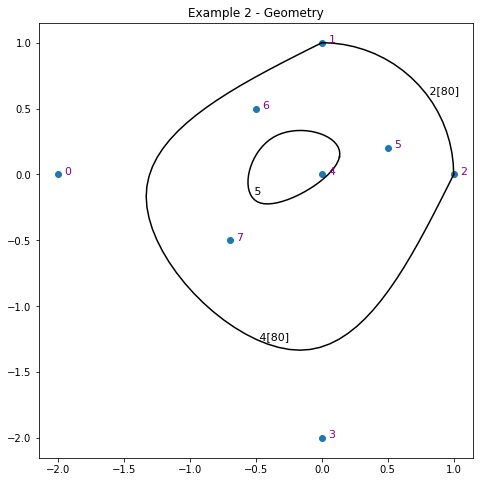

In [13]:
cfv.figure(figsize=(8,8))
cfv.draw_geometry(
    g,
    label_curves=True,
    title="Example 2 - Geometry"
)

### Draw mesh

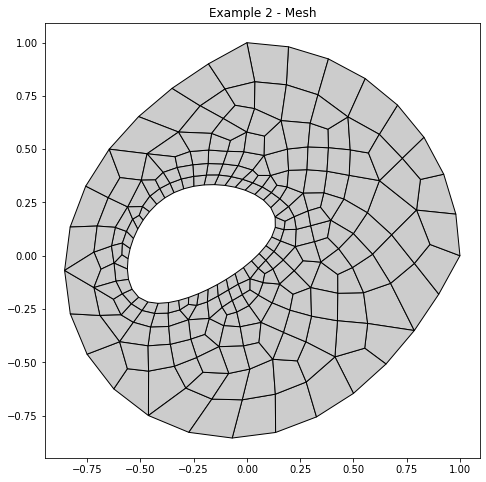

In [14]:
cfv.figure(figsize=(8,8))
cfv.draw_mesh(
    coords=coords,
    edof=edof,
    dofs_per_node=mesh.dofs_per_node,
    el_type=mesh.el_type,
    filled=True,
    title="Example 2 - Mesh"
)